# Image Analysis

In [35]:
# basic imports and notebook configurations
# standard Python modules
import logging
import os
import sys

# additional Python modules
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *
from fingers import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [36]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-05-15 16:02:33,479 - INFO - methods.py - get_image_files - Found 342 images for case 0.1mmspacer_0.4ml2
2023-05-15 16:02:33,874 - INFO - methods.py - get_image_files - Found 342 images for case 0.1mmspacer_0.4ml2
2023-05-15 16:02:33,940 - INFO - methods.py - process_image - -----------------------------
2023-05-15 16:02:33,942 - INFO - methods.py - process_image - processing image 00000050_0000000047C834C6
2023-05-15 16:02:33,943 - INFO - methods.py - process_image - -----------------------------
2023-05-15 16:02:34,327 - INFO - methods.py - process_image - Starting camera segmentation for image 00000050_0000000047C834C6
2023-05-15 16:02:40,018 - INFO - methods.py - process_image - Starting insta segmentation for image 00000050_0000000047C834C6
2023-05-15 16:02:41,431 - INFO - methods.py - process_image - Starting insta refining for image 00000050_0000000047C834C6
2023-05-15 16:02:42,730 - INFO - methods.py - process_image - Starting to close insta for image 00000050_0000000047C83

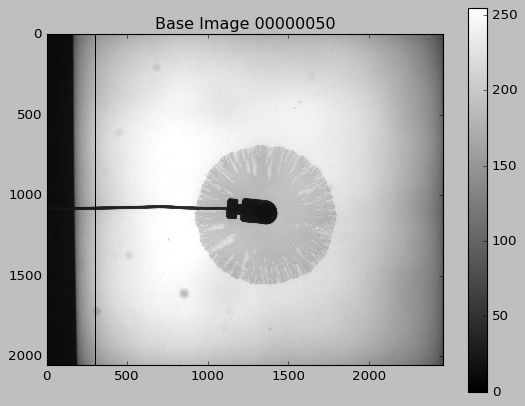

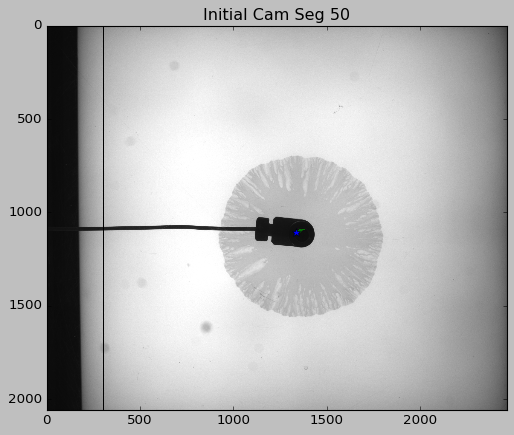

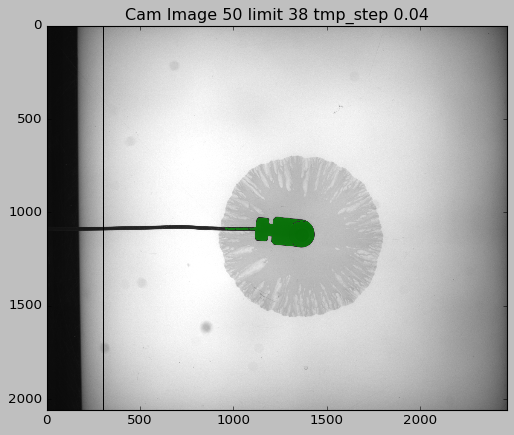

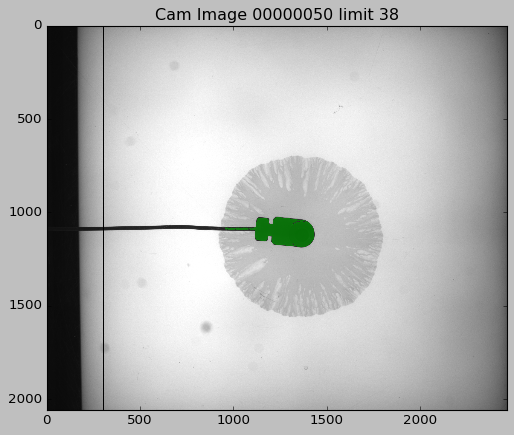

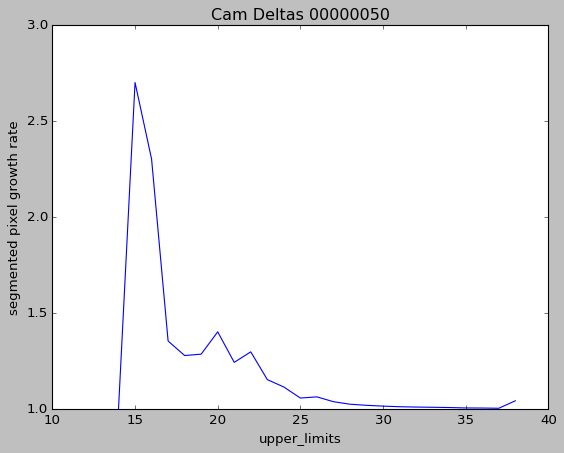

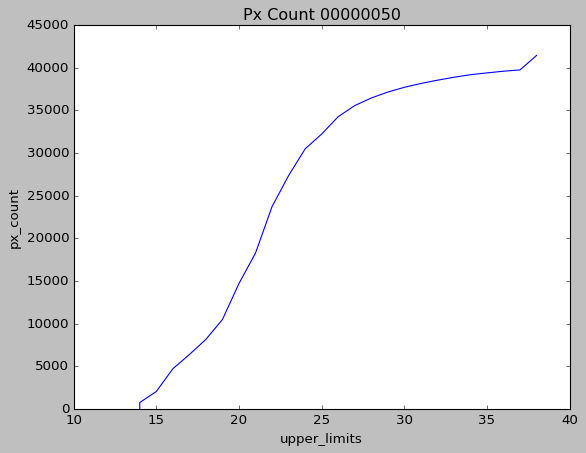

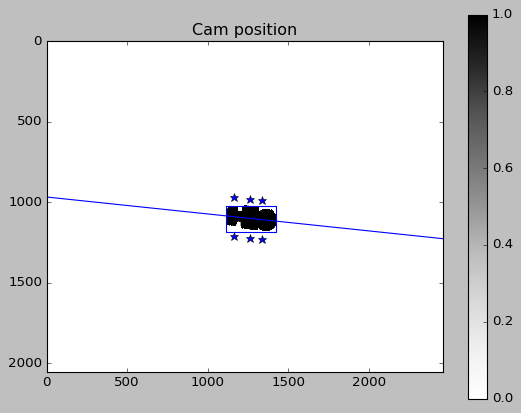

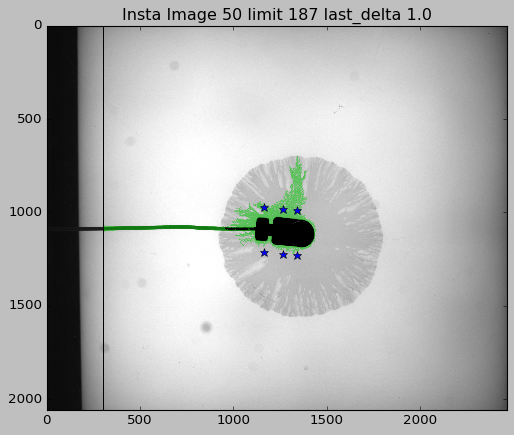

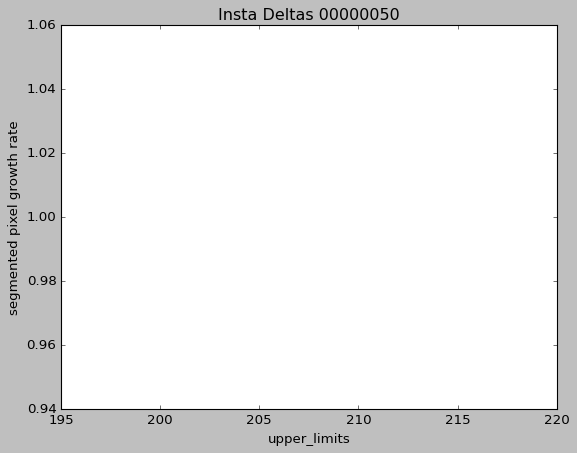

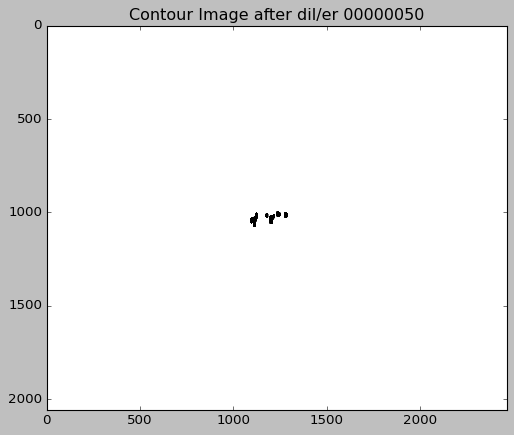

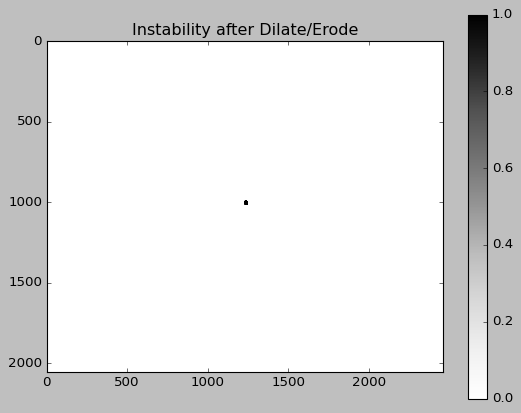

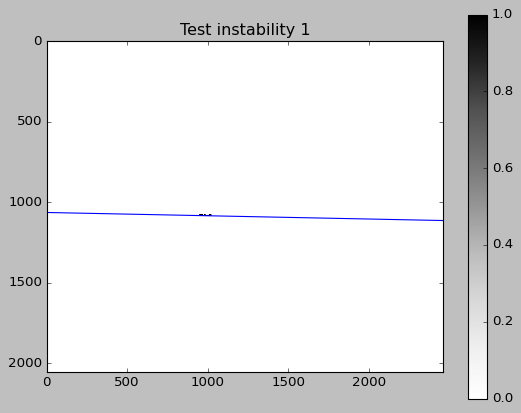

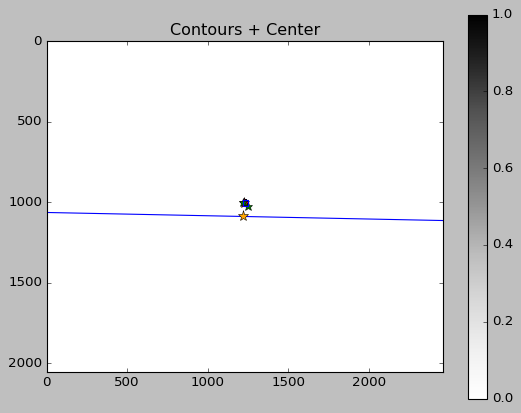

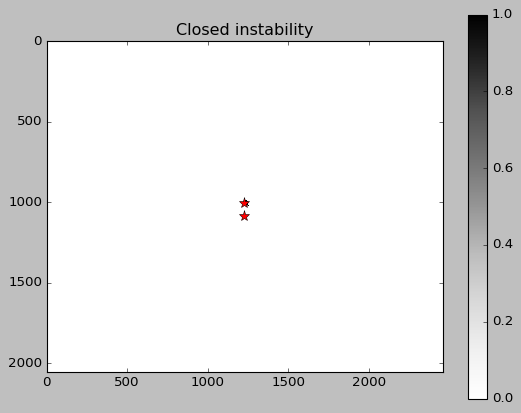

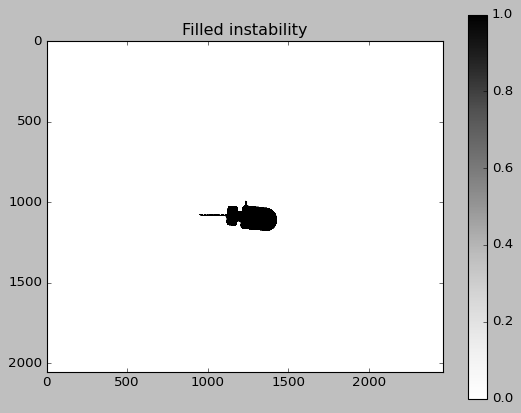

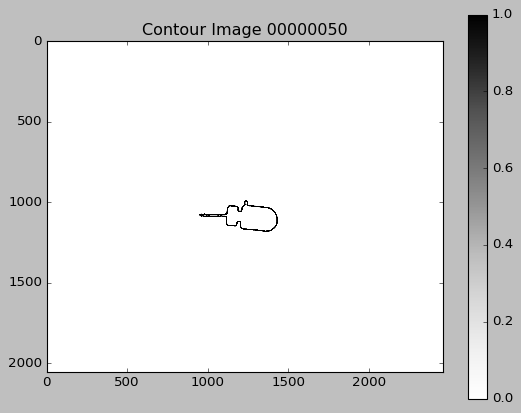

In [37]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:

    tmp_conf = config.copy()
    tmp_conf["images"] = []
    background_images = get_image_files(tmp_conf, cas, "png_cases")
    if background_images == []:
        background_images = get_image_files(tmp_conf, cas, "raw_cases")
    if background_images == []:
        logging.warning(f"No images found for case {cas}")
        continue

    background_img = get_base_image(config, cas, background_images[0])

    images = get_image_files(config, cas, "png_cases")
    for img in images:
        process_image(img, config, cas, background_img)

2023-05-15 16:02:52,841 - INFO - fingers.py - proc_cases - -------------------
2023-05-15 16:02:52,842 - INFO - fingers.py - proc_cases - Starting processing case 0.1mmspacer_0.4ml2
2023-05-15 16:02:52,843 - INFO - fingers.py - proc_cases - -------------------
2023-05-15 16:02:52,937 - INFO - methods.py - get_image_files - Found 342 images for case 0.1mmspacer_0.4ml2
2023-05-15 16:02:52,977 - INFO - methods.py - get_image_files - Found 342 images for case 0.1mmspacer_0.4ml2


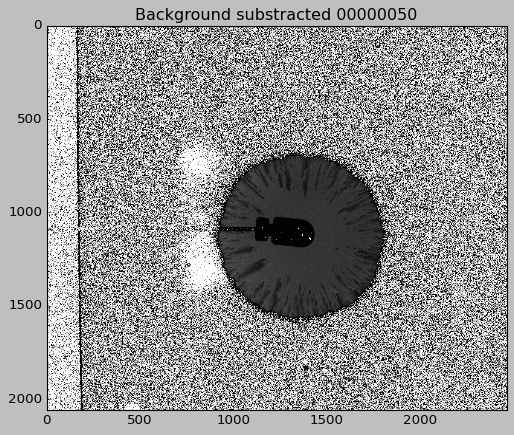

2023-05-15 16:02:54,126 - INFO - fingers.py - get_fingers - px val = 212


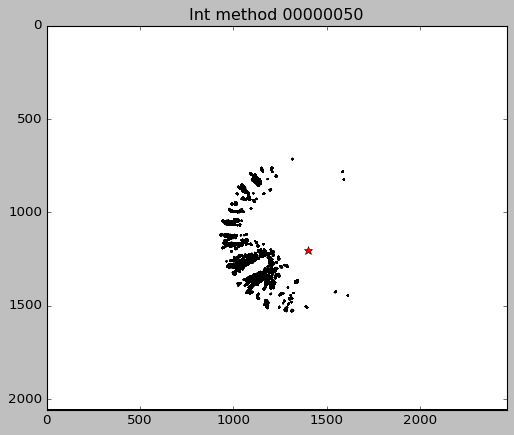

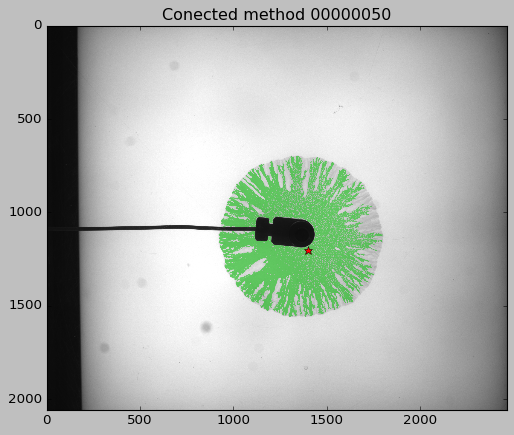

In [38]:
from fingers import *

config = get_config()
proc_cases(config)